In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# 1. Matrix Multiplication

In [ ]:
# element-wise multiplication
m1 = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(m1)
print(m1.shape)

m2 = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(m2)
print(m2.shape)

print(m1.mul(m2)) # dot product
print(m1*m2)

print(m1@m2)
print(m1.matmul(m2))

In [ ]:
m1 = torch.tensor([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print(m1)
print(m1.shape)

m2 = torch.tensor([[1,2,3,4],[5,6,7,8]])
print(m2)
print(m2.shape) # (4,4) (2,4)

m2 = m2.reshape(4,2)
print(m1@m2) # (4,4) (4,2) -> (4,2)
print(m1.matmul(m2).shape)
print(m1.matmul(m2.reshape(4,2)))

# 2. Linear Layer

### raw layer를 직접 만들어보기

In [ ]:
W = torch.FloatTensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(W.shape)
b = torch.FloatTensor([1,1,1])
print(b.shape)

def linear1(x, W, b):
    y = torch.matmul(x, W) + b
    return y

In [ ]:
x1 = torch.FloatTensor([1,1,1,1])

print(x1.shape)

# W*x1+b : torch.matmul(x, W) + b
print(linear1(x1, W, b))

In [ ]:
# batch 처리
x2 = torch.FloatTensor([[1,1,1,1],[2,2,2,2],[3,3,3,3]])
print(x2.shape) # |x| = (batch_size, input_dim)
print(linear1(x2, W, b))
print(linear1(x2, W, b).shape)
# |y| = (batch_size, input_dim) * (input_dim, output_dim)
#     = (batch_size, output_dim)

### nn.Module()

모든 뉴럴넷 모형의 기본

우리가 정의하는 모든 뉴럴넷 클래스는 nn.Module을 상속해야함

각 layer의 함수, 신경망 구조를 정의할때 사용

In [ ]:
# torch.nn : 뉴럴넷을 설계할때 필요한 대부분의 기본적인 layer 구조를 제공
import torch.nn as nn

In [ ]:
class MyLinear1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.W = torch.FloatTensor(input_dim, output_dim)
        self.b = torch.FloatTensor(output_dim)

    def forward(self, x):
        y = torch.matmul(x, self.W) + self.b
        # |y| = (batch_size, input_dim) * (input_dim, output_dim)
        #     = (batch_size, output_dim)
        return y

In [ ]:
linear2 = MyLinear1(4,3)

y = linear2(x2)
print(y.size())

In [ ]:
for p in linear2.parameters():
    print(p)

In [ ]:
class MyLinear1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.W = torch.FloatTensor(input_dim, output_dim)
        self.b = torch.FloatTensor(output_dim)

    def forward(self, x):
        y = torch.matmul(x, self.W) + self.b
        # |y| = (batch_size, input_dim) * (input_dim, output_dim)
        #     = (batch_size, output_dim)
        return y


class MyLinear2(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.W = nn.Parameter(torch.FloatTensor(input_dim, output_dim))
        self.b = nn.Parameter(torch.FloatTensor(output_dim))

    def forward(self, x):
        y = torch.matmul(x, self.W) + self.b
        # |y| = (batch_size, input_dim) * (input_dim, output_dim)
        #     = (batch_size, output_dim)
        return y

In [ ]:
linear2 = MyLinear2(4,3)
for p in linear2.parameters():
    print(p)

### nn.Linear()

일반적인 linear layer(=fully connected layer)를 구성

In [ ]:
linear3 = nn.Linear(in_features=4, out_features=3)

y = linear3(x2)
print(y.shape)

In [ ]:
for p in linear3.parameters():
    print(p)

In [ ]:
print(linear3.weight)
print(linear3.bias)

In [ ]:
class MyLinear3(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim

        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        y = self.linear(x)

        return y

In [ ]:
linear4 = MyLinear3(input_dim=4, output_dim=3)

y = linear4(x2)
print(y.shape)

In [ ]:
for p in linear4.parameters():
    print(p)

# 3. Activation Function

In [ ]:
# torch.nn.functional : 여러가지 연산에 사용되는 유용한 함수를 제공
# 대부분의 activation function을 제공 (relu, sigmoid, tanh, leeky_relu, softmax 등)
# torch.nn  vs  torch.nn.functional : nn은 클래스, nn.functional은 함수로 구현되어 있음
import torch.nn.functional as F

### Sigmoid

element-wise로 적용, 값을 [0,1] 사이의 값으로 변환해줌

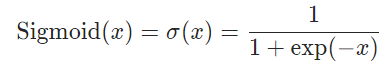

In [ ]:
# sigmoid
sigmoid = nn.Sigmoid()
input = torch.randn(2, 3)
print(input)
print(input.shape)

output = sigmoid(input)
print(output)

### ReLU

element-wise하게 적용

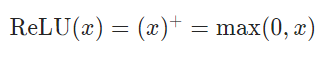

In [ ]:
# ReLU
relu = nn.ReLU()
input = torch.randn(2, 3)
print(input)
print(input.shape)

output = relu(input)
print(output)

### Softmax

Dimension을 정해주면 해당 dim에 대해 합이 1이 되도록 변환해 줌

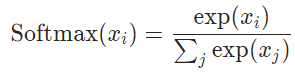

In [ ]:
# softmax
softmax = nn.Softmax(dim=1)
input = torch.randn(2, 3)
print(input)
print(input.shape)

output = softmax(input)
print(output) # dim=1 에 대해 softmax 함수 적용
output[1].sum()

# 4. Loss Function

### MSE Loss
Regression Task에 주로 사용,  predict값 <-> 실제 output값의 차이를 제곱합으로 계산

In [32]:
import torch.nn as nn

In [35]:
# nn.MSELoss()
mse_loss = nn.MSELoss()
pred = torch.randn(4, 10)
output = torch.randn(4, 10)
print(pred, output)
mse_loss(pred, output)

tensor([[-0.3536, -0.1451,  0.0427,  0.2535,  0.1483, -0.5321,  1.1957, -0.0233,
         -1.0460, -0.5932],
        [-0.1091,  0.1049,  0.9836,  2.6258,  0.0801, -0.2526,  0.0712,  0.9381,
         -0.6046,  0.2817],
        [ 0.1877, -1.8078,  0.6618, -1.1428,  0.8592,  0.1905,  0.6065, -1.1051,
         -0.2135,  0.1136],
        [-0.1752, -0.2482,  0.8297,  1.0315,  2.1110,  0.0523, -1.5888,  0.4625,
          1.6928,  0.3510]]) tensor([[ 0.0028, -0.3825, -1.0828,  0.7854, -0.0485, -1.3079,  0.1081, -1.3814,
         -1.4021,  0.2094],
        [-0.8117,  0.4453, -1.1933,  0.4259,  1.9839, -0.3146,  0.6089,  0.7211,
          0.4206, -0.0517],
        [-1.2701, -0.0827, -0.9588,  1.3930,  0.2098,  0.4964, -0.0434,  0.0633,
          0.3405,  0.8915],
        [ 1.4625,  1.2071,  0.4102,  0.5347,  0.6980, -1.4898,  1.4656,  0.9572,
         -1.1733,  0.5758]])


tensor(1.6574)

### nn.NLLLoss() : Negative Log Likelihood Loss


$log(Π(실제 결과)*(예측 확률))$

Softmax에 Log를 씌운 형태를 구현한 LogSoftmax 함수와 함께 사용하면 Cross Entropy Loss와 같아짐

why LogSoftmax?

nn.LogSoftmax() = torch.log(nn.Softmax())

계산 결과는 같지만 softmax에 의한 결과는 수치적으로 불안정해서 NaN의 결과를 얻을 수 있음, 따라서 NLL Loss에 직접적으로 사용될 수 없음

In [36]:
m = nn.LogSoftmax(dim=1)

nll_loss = nn.NLLLoss()

pred = torch.randn([1, 5], requires_grad=True)   # [0.23, 1.223, 0.772, -2.23, 0.885]
print(pred)
output = torch.tensor([1]) # [0,4] 사이 class label --> [0, 1, 0, 0, 0]

print(torch.log(F.softmax(pred)))  # 계산 결과는 같지만 큰 텐서를 연산할때 불안정해서 Nan 값 생성항
print(m(pred))
print(nll_loss(m(pred), output))

tensor([[-0.9808, -0.9913,  0.1963,  1.3051, -0.1021]], requires_grad=True)
tensor([[-2.8609, -2.8714, -1.6838, -0.5750, -1.9822]], grad_fn=<LogBackward0>)
tensor([[-2.8609, -2.8714, -1.6838, -0.5750, -1.9822]],
       grad_fn=<LogSoftmaxBackward0>)
tensor(2.8714, grad_fn=<NllLossBackward0>)


<ipython-input-36-8a732e7a704b>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(torch.log(F.softmax(pred)))  # 계산 결과는 같지만 큰 텐서를 연산할때 불안정해서 Nan 값 생성항


In [37]:
pred = torch.randn([3, 5], requires_grad=True)
print(pred)
output = torch.tensor([1, 0, 3]) # [0,4] 사이 class label, index
# [0, 1, 0, 0, 0]
# [1, 0, 0, 0, 0]
# [0, 0, 0, 1, 0]

print(m(pred))
print(nll_loss(m(pred), output))

tensor([[-0.1579, -1.5036,  1.1366,  0.9550, -0.3177],
        [-0.1408,  1.2132, -1.5202, -0.5653, -0.3353],
        [ 0.4885,  0.2891,  1.5917,  0.4777, -2.3118]], requires_grad=True)
tensor([[-2.1754, -3.5211, -0.8808, -1.0624, -2.3351],
        [-1.8873, -0.5334, -3.2668, -2.3119, -2.0819],
        [-1.7721, -1.9715, -0.6689, -1.7829, -4.5724]],
       grad_fn=<LogSoftmaxBackward0>)
tensor(2.3971, grad_fn=<NllLossBackward0>)


In [40]:
ce_loss = nn.CrossEntropyLoss()
pred = torch.randn(1, 5, requires_grad=True)
print(pred.shape)
print(pred)
output = torch.tensor([0], dtype=torch.long) # [0,4] 사이 class label
# [1, 0, 0, 0, 0]
print(output.shape)

ce_loss(pred, output)

torch.Size([1, 5])
tensor([[ 1.8610, -0.8928, -0.2405,  0.7375,  1.1500]], requires_grad=True)
torch.Size([1])


tensor(0.6943, grad_fn=<NllLossBackward0>)

In [42]:
pred = torch.randn(3, 5, requires_grad=True)
print(pred.shape)
print(pred)
output = torch.tensor([0,4,0], dtype=torch.long) # [0,4] 사이 class label
print(output.shape)
# [1, 0, 0, 0, 0]
# [0, 0, 0, 0, 1]
# [1, 0, 0, 0, 0]

ce_loss(pred, output)

torch.Size([3, 5])
tensor([[ 0.0737, -1.5120,  0.0472, -0.2144, -0.4436],
        [-0.7497, -0.4952,  1.4746, -0.2185,  0.4391],
        [ 0.2616,  1.5923,  0.2704, -1.7517,  2.4972]], requires_grad=True)
torch.Size([3])


tensor(1.8673, grad_fn=<NllLossBackward0>)

In [43]:
# Example of target with class probabilities
pred = torch.randn(3, 5, requires_grad=True)
output = torch.randn(3, 5).softmax(dim=1) # output이 확률값인 경우
print(output)
ce_loss(pred, output)

tensor([[0.2965, 0.0456, 0.1994, 0.1039, 0.3546],
        [0.2686, 0.3057, 0.0698, 0.2088, 0.1471],
        [0.2296, 0.0344, 0.3610, 0.2016, 0.1734]])


tensor(1.8537, grad_fn=<DivBackward1>)

# 5. Loss 최적화

pytorch에 구현 되어있는 Optimizer 종류 : https://pytorch.org/docs/stable/optim.html

In [44]:
# 모델 선언

class MyLinear3(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim

        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        y = self.linear(x)
        return y

model = MyLinear3(5, 3)

In [45]:
for p in model.parameters():
    print(p) # update 의 대상

Parameter containing:
tensor([[-0.1372,  0.2355,  0.4278,  0.1546, -0.0683],
        [ 0.0439,  0.4096,  0.2496,  0.0042,  0.3872],
        [-0.0007,  0.1660,  0.4076,  0.4324, -0.0848]], requires_grad=True)
Parameter containing:
tensor([ 0.0967, -0.3174, -0.1598], requires_grad=True)


### SGD : Stocastic Gradient Descent
데이터 중 일부만 샘플링하여 gradient를 계산함으로써 효율적으로 연산이 가능함

In [ ]:
# SGD
sgd_optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

### ADAM : RMSProp + Momentum
Gradient로 업데이트하는 step의 size와 방향을 모두 고려하여 update하는 방식

In [ ]:
# ADAM
adam_optimizer = torch.optim.ADAM(model, lr=0.001, betas=(0.9, 0.999))